# Matplotlib

Matplotlib é uma biblioteca Python para traçar gráficos 2D que produz figuras de qualidade em vários formatos distintos. Matplotlib pode ser usado em scripts Python, no Python e IPython shell, no jupyter notebook entre outros.

Matplotlib é uma ferramenta bem versátil, que nos permite fazer praticamente qualquer tipo de gráfico (nem todos de maneira fácil). Pode-se traçar pontos, histogramas, gráfico em barras, gráficos de dispersão, etc., com poucas linhas de código ([galeria](https://matplotlib.org/gallery.html)).

Praticamente, todas as bibliotecas de visualização estatística, tais como seaborn, plotnine entre outras, são construídas utilizando rotinas do Matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd


%matplotlib inline

np.random.seed(123)

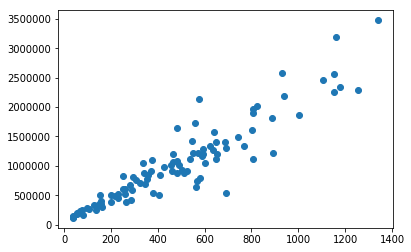

In [2]:
X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis] 
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

plt.scatter(X, y)

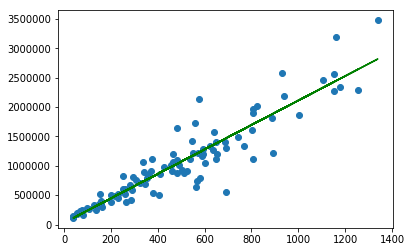

In [3]:
X_l = np.hstack((np.ones((X.shape[0], 1)), X))

b, w = np.linalg.inv(X_l.T.dot(X_l)).dot(X_l.T).dot(y).ravel()

plt.scatter(X, y)
plt.plot(X, w*X + b, color="green")

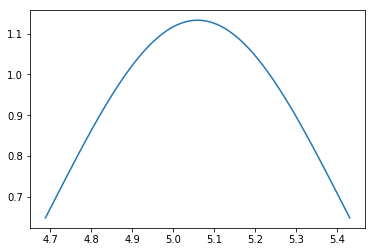

In [4]:
mu = 5.06
varianca = 0.124
sigma = np.sqrt(varianca)
x = np.linspace(mu - 3*varianca, mu + 3*varianca, 100)

# plotando uma distribuição normal
plt.plot(x, stats.norm(mu, sigma).pdf(x))

## Gráficos Estatísticos

Muitas vezes em nossas análises os gráficos produzidos são os mesmo, mudando apenas o conjunto de dados em questão. 

Apesar do Matplotlib ser muito versátil, muitas vezes é tedioso fazer gráfico com ele, pois ele é um tanto baixo-nível devido, justamente, há sua versatilidade.

Há em python algumas bibliotecas para traçar gráficos predefinidos que foram projetados para se integrar muito bem ao pandas.DataFrame.

Duas dessas bibliotecas são o [Searborn](https://seaborn.pydata.org/) e [Plotnine](https://github.com/has2k1/plotnine). Nesse curso vamos forcar apenas no Plotine, pois o Plotnine é inspirado no ggplot 2 do R que é uma ferramenta de visualização poderozíssima.

### Plotnine

Plotnine é uma implementação de uma [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431) em Python, é baseada no [ggplot2](http://ggplot2.tidyverse.org/reference/). A gramática nos permite compor gráficos mapeando explicitamente dados aos objetos visuais compõe o gráfico.

Traçar gráficos com uma gramática é poderoso, ela torna gráficos personalizados, muitas vezes complexos, fácil de se imaginar e criá-los, enquanto os gráficos simples se mantém simples.

Basicamente, você provê o dado, dizendo ao plotnine como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

#### O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do gráfico e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

In [5]:
from plotnine import *

X = np.abs(np.random.normal(60, 500, 100))[:, np.newaxis] 
X[X <= 40] = 40
w = 2000
y = X * (w - np.random.normal(0, 500, X.shape[0]))[:, np.newaxis] + 60000

df = pd.DataFrame(np.hstack((X, y)), columns=['area', 'preco'])

df.head()

C:\Users\Joao\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,area,preco
0,411.655059,7.258408e+05
1,239.052666,6.371913e+05
2,1160.351050,2.763126e+06
3,404.148465,7.448046e+05
4,56.846375,1.777861e+05


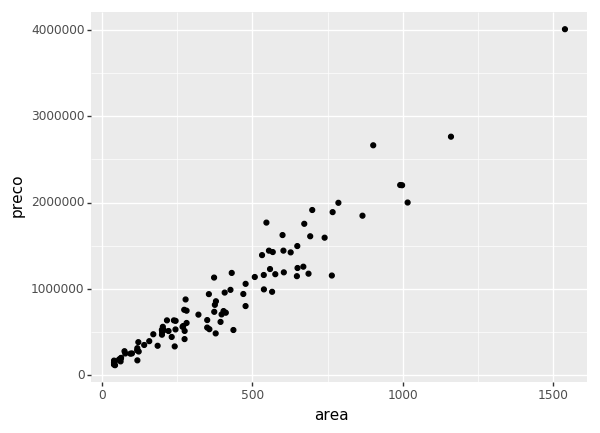

<ggplot: (-9223371870270436394)>

In [6]:
(ggplot(df, aes(x = 'area', y = 'preco')) +
geom_point())

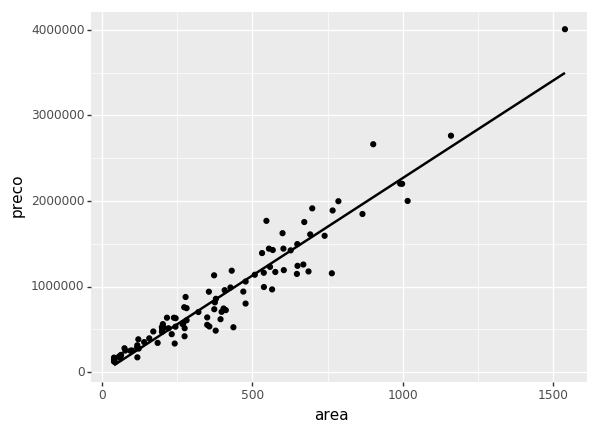

<ggplot: (166585135301)>

In [7]:
(ggplot(df, aes(x = 'area', y = 'preco')) + 
     geom_point()  +
    geom_smooth(method='lm', se = False))

## Objetos Geométricos e Mapas Estéticos

### Mapa Estétisco

No plotnine(ggplot) estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [8]:
iris = pd.read_csv('../dados/iris-dataset.csv', 
                 header=None,
                 names=['sepal_length', 
                        'sepal_width', 
                        'petal_length', 
                        'petal_width', 
                        'species'])

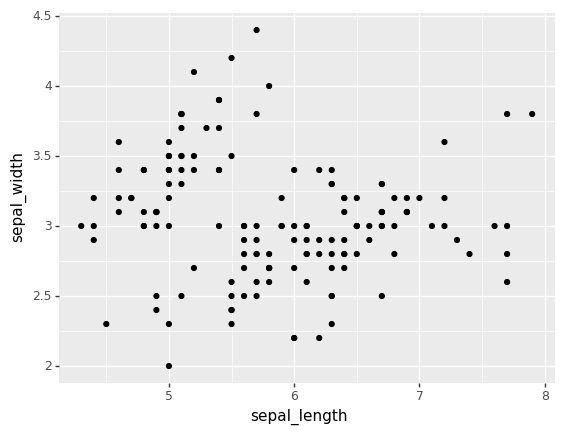

<ggplot: (-9223371870269499262)>

In [9]:
ggplot(iris, aes(x='sepal_length',
                 y='sepal_width')) + geom_point() 

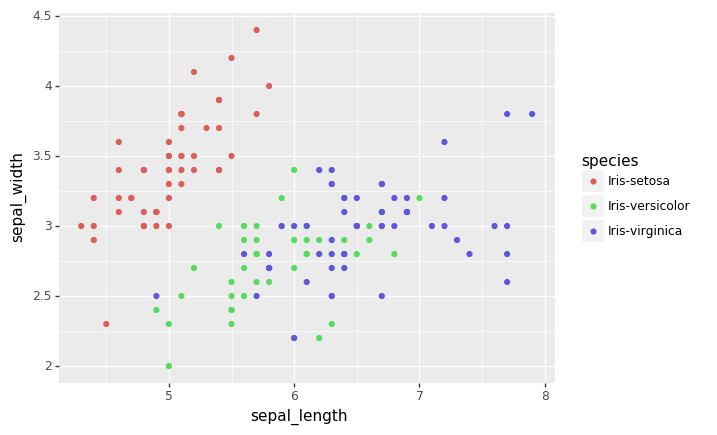

<ggplot: (-9223371870269587831)>

In [10]:
# adcione os seguintes aesthetic: size='petal_width', shape='species', color="petal_width"
ggplot(iris, aes(x='sepal_length',
                 y='sepal_width', 
                 color='species')) + geom_point()

## Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

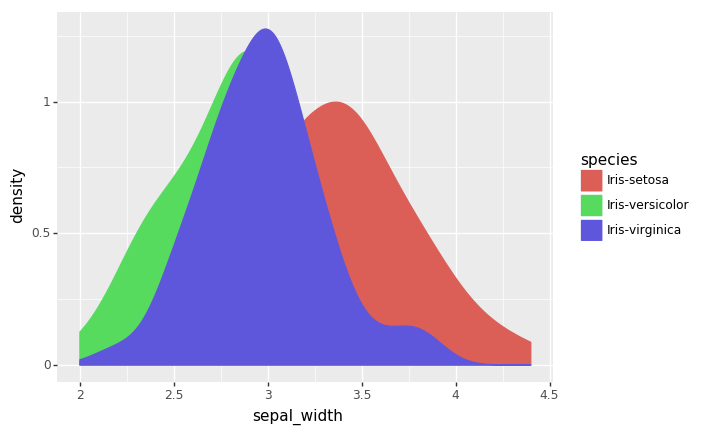

<ggplot: (166585238953)>

In [11]:
ggplot(iris, aes(x='sepal_width',
                 fill='species',
                 color='species')) + geom_density()

In [13]:
ggplot(iris, aes(x = 'sepal_length',
                 y= 'sepal_width',
                color='species',
                fill='species')) + geom_density_2d()

NameError: name 'geom_density_2d' is not defined

## Boxplot

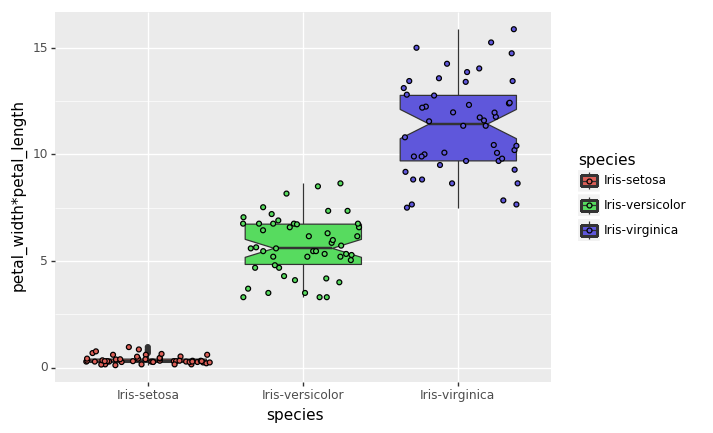

<ggplot: (-9223371870269395726)>

In [17]:
(ggplot(iris, aes(x='species',
                 y='petal_width*petal_length',
                 fill='species')) + 
geom_boxplot(notch=True) +
geom_jitter())

## Violin plot

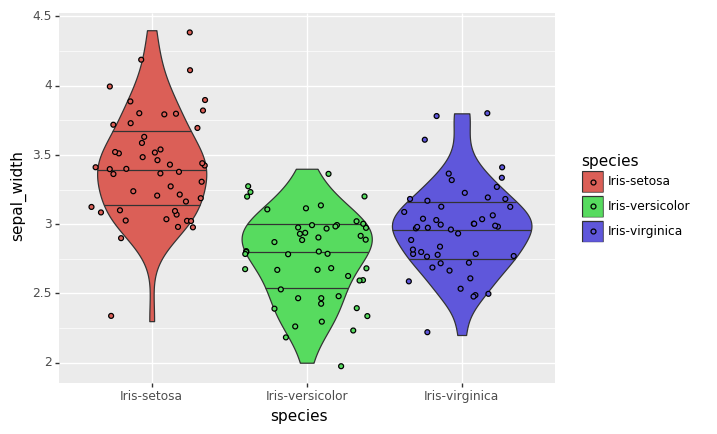

<ggplot: (-9223371870267846947)>

In [18]:
(ggplot(iris, aes(x='species',
                 y='sepal_width',
                 fill='species')) + 
geom_violin(draw_quantiles=(0.25, 0.5, 0.75)) + 
geom_jitter())

## Faceting

In [19]:
(ggplot(iris, aes(x='sepal_length',
                      y='petal_width', 
                      color='species')) + 
geom_density_2d() +
facet_wrap('~species'))

NameError: name 'geom_density_2d' is not defined

`facet_grid` fomar uma matriz de paineis definida pela colunas e linhas. É mais util quando se há duas variáveis discretas, e todas as combinações delas existem no dado.

In [20]:
iris['species1'] = iris.species
(ggplot(iris, aes(x='sepal_length',
                      y='petal_width', 
                      color='species')) + 
geom_density_2d() +
facet_grid('species1~species'))

NameError: name 'geom_density_2d' is not defined